# Classification Analysis on Predicting Defaults from Credit Card Customers

Dataset Description:

The dataset for this project consists of default payments from a credit card company in Taiwan and is available at UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The objective of this lab is to use SVM and Logistic Regression Classification models to predict whether or not a customer will default on their credit card.

The data set consists of 30,000 instances and 24 attributes consisting of gender, education profile, marital status,age, history of statement balance, payment status and binary status of default ( 1 or 0).

Attribute Information:
The data set uses Default Payment as the response variable, it is binary variable with values 1 for Yes and 0 for No. It uses the following 23 variables as explanatory variables:

    Limit Balance: Balance of given credit dollars, it includes both the individual consumer credit and his/her family credit. 
    Variable Type: Interval

    Gender: 1 = male, 2 = female. 
    Variable type: Nominal

    Education: 1 = graduate school, 2 = university, 3 = high school, 4 = others. 
    Variable type: Ordinal

    Marital status: 1 = married; 2 = single; 3 = others. 
    Variable type: Nominal

    Age in years
    History of past payment, tracking the past monthly payment records from April to September, 2005. The measurement scale for the repayment statu is as follows: -1 = pay duly;1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
    
    There are six payment variables:
    PAY_0=Payment status for September, 2015 through
    PAY_6=Payment status for April, 2005
    
    Amount billed are variables that include billed statements in dollars for the month of September through April 20015.
    BILL_AMT1: Corresponds to September, 2015 through 
    BILL_AMT6: Corresponds to April, 2015. PAY_AMT1 
    
    Payment amount are varialbes that inlcude previous payment in dollars paid in September, 2005 through April, 2015.
    PAY_AMT1: Corresponds to September, 2015 through   
    PAY_AMT6: Corresponds to April, 2015. 
    
    The response variable is Default and is represented by 1 which means Yes or 0 for No.


### Goal: 

Our goal in this assignment is to do the following -

1) Classifier Task : Build a best - fit classifer to predict if a customer will default on his payment or not based on his payment history, bill amounts, demographic information.

2) Regression Task: Build a best-fit model to predict the amount a customer would pay based on his payment history, Bill Amounts, demographic information. (Regress on variable Pay_Amt_1 for the month of September).

We have seprated each task into separate notebooks for practical purposes. The classification part of notebook in itself takes about 2-3 hours to run; while the regression part can take up to an hour. While we use Jupyter notebook for both tasks, many sections of the linear regression have been coded in R, which requires a manual change in the kernal. We have followed the rubric categories end to end for each task!

In this notebook, we focus on the classification task of predicting customers who are more likely to Default! The regression portion is in the file named - Lab2_Classification_Final.ipynb

## CLASSIFICATION: Predicting Customers who are likely to Default

### Data Preparation - Part 1 & 2 : 

We delete the ID variable as it does not have any significance. We also bin the age variable into 4 ranges to determine if the age variable has any influence on predicting customers who might default.

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import numpy as np
import pandas as pd

# read in the csv file
df = pd.read_excel('data/credit.csv')

# Delete ID
del df['ID']

# New variable Age Range
# This was created by dividing the continuous variable Age into 4 bins and our later analysis shows that Age range is a better predictor than Age.
df['age_range'] = pd.cut(df.AGE,[0,30,45,65,80],4,labels=[0,1,2,3]) # this creates a new variable

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
Default      30000 non-null int64
age_range    30000 non-null category
dtypes: category(1), int64(24)
memory 

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   PAY_5    ...      BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2    ...              0          0         0       689         0   
1      0    ...           3455       3261         0      1000      1000   
2      0    ...          14948      15549      1518      1500      1000   
3      0    ...          28959      29547      2000      2019      1200   
4      0    ...          19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default  age_range  
0         0         0         0        1          0  
1      1000         0      2000        1          0  
2      1000      1000      5000        0          1  
3      1100      1069      1000        0          1  
4      9000       689       679        0          2  

[5 rows x 25 columns]

In [2]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

           ...           BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count      ...        30000.000000   30000.000000   30000.000000   
mean       ...        43262.948967   40311.400967   38871.760400   
std        ...        64332.856134   60797.155770   59554.107537   
min        ...      -170000.000000  -81334.000000 -339603.000000   
25%        ...         2326.750000    1763.000000    1256.000000   
50%        ...        19052.000000   18104.500000   17071.000000   
75%        ...        54506.000000   50190.500000   49198.250000   
max        ...       891586.000000  927171.000000  961664.000000   

            PAY_AMT1        PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000    30000.000000   30000.00000   30000.000000   
mean     5663.580500     5921.163500    5225.68150    4826.076867   
std     16563.280354    23040.870402   17606.96147   15666.159744   
min         0.000000        0.000000       0.00000       0.000000   
25%      1000.000000      833.000000     390.00000     296.000000   
50%      2100.000000     2009.000000    1800.00000    1500.000000   
75%      5006.000000     5000.000000    4505.00000    4013.250000   
max    873552.000000  1684259.000000  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6       Default  
count   30000.000000   30000.000000  30000.000000  
mean     4799.387633    5215.502567      0.221200  
std     15278.305679   17777.465775      0.415062  
min         0.000000       0.000000      0.000000  
25%       252.500000     117.750000      0.000000  
50%      1500.000000    1500.000000      0.000000  
75%      4031.500000    4000.000000      0.000000  
max    426529.000000  528666.000000      1.000000  

[8 rows x 24 columns]

There does not seem to be any missing values in this dataset.

In [4]:
# Count of Default vs Non-Defaulters

b = df.groupby(['Default'])
b.size()

Default
0    23364
1     6636
dtype: int64

In our dataset of 30K customers, the no of Defaulters is around 22% of the dataset. As the distributions of the defaults and non-defaults are unequal and to ensure we get a representative sample of the data, we decide to use Stratified sampling on our dataset.

The final dataset we decide to use for Classification task is the dataframe df with all variables except ID and with the inclusion of the age range variable. As we have just 30K records, we decide not to do any Dimensionality reduction. Also we scale the variables (normalize the variables) while running the classifiers.

### Modeling & Evaluation - Part 1: Metrics 

To choose the best fit model , we will examine the combintaion of some of the following metrics - 

1) Confusion matrix: To get the no of  True and False values as below -

    T - Number of customers who defaulted
    
    F - Number of non-defaulters
    
    TP - Customers who actually defautled while we predicted as Defaults
    
    FN -  Customers who defaulted, while we predicted as Non-defaults

    TN - Customers who did not default in actual, we predicted as non-defaults as well

    FP - Customers whom we predicted to Default, but they in actual did not default

2) Accuracy - Overall measurement of how correct the classifier is. Calculated by (TP+TN)/100

3) Misclassification/Error : Error rate for predicting defaults and non-defaults incorrectly. Calculated by (FP+FN)/100

4) TPR/Recall/Sensitivity: Predicting defaults correctly, when they truly default - TP/Actual yes

5) False Positive Rate: Predicting defaults when customers do not default: FP/Actual No

6) Specificity: Predicting Non-defaulters when they actually do not default - TN/actual no

7) Precision: Corectly predicting defaults : TP/predicted yes 

8) Prevalence: Occurance of actual number of defaults: actual yes/total 


In the business domain of distributing credit, though a goal is to be able to predict customers who are likely to default(maximizing TP) , its more important to avoid predicting non-defaulters who in actuality default (i.e. minimizing the FN)

We use a combination of accuracy, TP ratio and FN ratio to choose the best fit models.


### Modeling & Evaluation - Part 2: Data Splitting & Cross Validation

For classification, we wish to predict the no of customers who are likely to default, hence our response is the variable "Default"; while the rest of the variables are the predictors

We use cross validation to get a more representative sample and ensure more variance to train the model. Cross validation splits the data into training and testing sets in order to test how well the model will generalize to other data sets.
 
According to several articles and posts - several tests have been performed on numerous datasets, with different learning techniques and they have shown that 10 is about the right number of folds to get the best estimate of error.  However,  10 fold is not a definite number, but dependent on the total number of training instances itself. The larger the dataset, the fewer folds are needed to produce a robust (test-ready) model. Since this dataset contains 30,000 observations (not considered large in the context of machine learning), we will use the  10 fold cross validation technique.

Instead of using the ShuffleSplit function, we choose to use the Sytratified Shuffle Split function which provides an 80-20 split as well as returns stratified randomized folds.


In [5]:
# Stratified Split

from sklearn.model_selection import StratifiedShuffleSplit
if 'Default' in df:
    y = df['Default'].values #Default is the response variable
    del df['Default'] # deleting the Default label
    X = df.values #All other variables are used as predictors

cv_strat = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
cv_strat.get_n_splits(X, y)
print(cv_strat)    

StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None)


We use the stratified object for our models going forward, as the no of default vs non-defaulters in the dataset is  unequal and stratified splitting will help us achieve a more representative sample of our data per fold/iteration which would lead to a better precise prediction model.

### Modeling & Evaluation - Part 3: Classification Models

For each of the model we adjust through the various parameters (as shown below). We choose the following classification models - 

    1) Logistic Regression
    2) K-Nearest Neighbors
    3) Random Forest
    4) ADA Boost
    5) Decision Tree Classifier
    
We choose the best fit model within each classifier and then compare the performance amongst the classifiers in the below section (Model and Evaluation 5) to choose the best fit classifier amongst them.

#### Logistic Regression

We run the logistic regression on the Default variable with 10-fold cross validation with a penalty of l2, cost of 0.5 on the balanced classes.

In [4]:
#Logistic with Stratified split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# Create logistic regression object for 10 fold CV with cost of 1
lr_clf = LogisticRegression(penalty='l2', C=0.5, class_weight='balanced') # get object

acc=0
iter_num=0
acc_mat = []
conf_mat = []

print("========= 10 Fold Stratified CV ============")
print("=========== Cost = 0.5 ============")
for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train the logistic regression model on the training data
    lr_clf.fit(X_train,y_train)  
    y_hat = lr_clf.predict(X_test)

     # Get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(acc)
    conf_mat.append(conf)
    print("====Iteration",iter_num,"====")
    print("accuracy", acc )
    print("confusion matrix",conf)
    iter_num+=1 
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average accuracy",avg_acc)
print("Average Confusion Matrix", avg_conf)

========= 10 Fold CV ============
=========== Cost = 0.5 ============
('====Iteration', 0, '====')
('accuracy', 0.64649999999999996)
('confusion matrix', array([[3060, 1613],
       [ 508,  819]]))
('====Iteration', 1, '====')
('accuracy', 0.62450000000000006)
('confusion matrix', array([[2834, 1839],
       [ 414,  913]]))
('====Iteration', 2, '====')
('accuracy', 0.65649999999999997)
('confusion matrix', array([[3086, 1587],
       [ 474,  853]]))
('====Iteration', 3, '====')
('accuracy', 0.68799999999999994)
('confusion matrix', array([[3290, 1383],
       [ 489,  838]]))
('====Iteration', 4, '====')
('accuracy', 0.6835)
('confusion matrix', array([[3241, 1432],
       [ 467,  860]]))
('====Iteration', 5, '====')
('accuracy', 0.63)
('confusion matrix', array([[2941, 1732],
       [ 488,  839]]))
('====Iteration', 6, '====')
('accuracy', 0.69233333333333336)
('confusion matrix', array([[3281, 1392],
       [ 454,  873]]))
('====Iteration', 7, '====')
('accuracy', 0.66883333333333328)

We normalize the variables using the Standard Scaler funciton to standardize/equalize the range of the variables to see the variations better

In [18]:
# Normalize Logistic Regression on Stratified Split

acc=0
iter_num=0
acc_mat = []
conf_mat = []

from sklearn.preprocessing import StandardScaler

for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
   
    X_train_scaled = scl_obj.transform(X_train) 
    X_test_scaled = scl_obj.transform(X_test) 
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train)

    lr_clf = LogisticRegression(penalty='l2', C=0.5) 
    lr_clf.fit(X_train_scaled,y_train)  

    y_hat = lr_clf.predict(X_test_scaled) 

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
     
    acc_mat.append(acc)
    conf_mat.append(conf)
    print("====Iteration",iter_num,"====")
    print("accuracy", acc )
    print("confusion matrix",conf)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average Normalized accuracy",avg_acc)
print("Average Normalized Confusion Matrix", avg_conf)

('====Iteration', 0, '====')
('accuracy', 0.81166666666666665)
('confusion matrix', array([[4555,  118],
       [1012,  315]]))
('====Iteration', 1, '====')
('accuracy', 0.81566666666666665)
('confusion matrix', array([[4561,  112],
       [ 994,  333]]))
('====Iteration', 2, '====')
('accuracy', 0.81466666666666665)
('confusion matrix', array([[4564,  109],
       [1003,  324]]))
('====Iteration', 3, '====')
('accuracy', 0.8111666666666667)
('confusion matrix', array([[4561,  112],
       [1021,  306]]))
('====Iteration', 4, '====')
('accuracy', 0.8115)
('confusion matrix', array([[4562,  111],
       [1020,  307]]))
('====Iteration', 5, '====')
('accuracy', 0.81166666666666665)
('confusion matrix', array([[4550,  123],
       [1007,  320]]))
('====Iteration', 6, '====')
('accuracy', 0.81416666666666671)
('confusion matrix', array([[4556,  117],
       [ 998,  329]]))
('====Iteration', 7, '====')
('accuracy', 0.80666666666666664)
('confusion matrix', array([[4539,  134],
       [1026,

Comparing the Accuracies and other metrics for the Logistic model run on original test data (model 1) vs the metrics on logistic regression run on Normalized data (model 2)

As mentioned above, though model 2 (normalized) has a higher accuracy of 81.57%, compared to 66.24%(original), the FN ratio (predicting customers as non-defaulters while they actually default) of model 1 is low, compared to model 2 (469 vs 993). The TPR ratio is also higher in model 1 than model 2 (64.63% vs 25.17). Hence we choose model 1 (Logistic regression without normalization) as a beter fit model.


![title](data/Lab2_LogReg_Fig1.png)

#### K-Nearest Neighbors

In [5]:
# 10 Fold Startified KNN; neighbors = 5

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

acc=0
iter_num=0
acc_mat = []
conf_mat = []

for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    total_accuracy = mt.accuracy_score(y_test,y_hat)
    Conf_Mat = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(total_accuracy)
    conf_mat.append(Conf_Mat)
    print("====Iteration",iter_num,"====")
    print("KNN accuracy", total_accuracy )
    print("KNN confusion matrix",Conf_Mat)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average KNN accuracy",avg_acc)
print("Average KNN Confusion Matrix", avg_conf)   

/Users/shweta/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('====Iteration', 0, '====')
('KNN accuracy', 0.75749999999999995)
('KNN confusion matrix', array([[4294,  379],
       [1076,  251]]))
('====Iteration', 1, '====')
('KNN accuracy', 0.75749999999999995)
('KNN confusion matrix', array([[4291,  382],
       [1073,  254]]))
('====Iteration', 2, '====')
('KNN accuracy', 0.75083333333333335)
('KNN confusion matrix', array([[4268,  405],
       [1090,  237]]))
('====Iteration', 3, '====')
('KNN accuracy', 0.75483333333333336)
('KNN confusion matrix', array([[4295,  378],
       [1093,  234]]))
('====Iteration', 4, '====')
('KNN accuracy', 0.75649999999999995)
('KNN confusion matrix', array([[4294,  379],
       [1082,  245]]))
('====Iteration', 5, '====')
('KNN accuracy', 0.7533333333333333)
('KNN confusion matrix', array([[4266,  407],
       [1073,  254]]))
('====Iteration', 6, '====')
('KNN accuracy', 0.74950000000000006)
('KNN confusion matrix', array([[4266,  407],
       [1096,  231]]))
('====Iteration', 7, '====')
('KNN accuracy', 0.7

In [6]:
# 10 Fold Startified KNN - Brute - Neighbors = 5

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

acc=0
iter_num=0
acc_mat = []
conf_mat = []

for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = KNeighborsClassifier(n_neighbors=5,algorithm='brute')
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    total_accuracy = mt.accuracy_score(y_test,y_hat)
    Conf_Mat = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(total_accuracy)
    conf_mat.append(Conf_Mat)
    print("====Iteration",iter_num,"====")
    print("KNN accuracy", total_accuracy )
    print("KNN confusion matrix",Conf_Mat)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average KNN accuracy",avg_acc)
print("Average KNN Confusion Matrix", avg_conf) 

('====Iteration', 0, '====')
('KNN accuracy', 0.75766666666666671)
('KNN confusion matrix', array([[4295,  378],
       [1076,  251]]))
('====Iteration', 1, '====')
('KNN accuracy', 0.75749999999999995)
('KNN confusion matrix', array([[4291,  382],
       [1073,  254]]))
('====Iteration', 2, '====')
('KNN accuracy', 0.75049999999999994)
('KNN confusion matrix', array([[4267,  406],
       [1091,  236]]))
('====Iteration', 3, '====')
('KNN accuracy', 0.75466666666666671)
('KNN confusion matrix', array([[4296,  377],
       [1095,  232]]))
('====Iteration', 4, '====')
('KNN accuracy', 0.7563333333333333)
('KNN confusion matrix', array([[4294,  379],
       [1083,  244]]))
('====Iteration', 5, '====')
('KNN accuracy', 0.75316666666666665)
('KNN confusion matrix', array([[4265,  408],
       [1073,  254]]))
('====Iteration', 6, '====')
('KNN accuracy', 0.74916666666666665)
('KNN confusion matrix', array([[4267,  406],
       [1099,  228]]))
('====Iteration', 7, '====')
('KNN accuracy', 0.7

We ran the KNN classifiers with the following permutations - 

Model 1: KNN classifier with automatic algorthm option vs Model 2: KNN Classifier with Brute algorithm

![title](data/Lab2_LogReg_Fig2.png)

We observe that the accuracies amongst the 2 algorithms are almost the same. We also ran the clasifier with KD_Tree and Ball_Tree options and the accuracies were almost similar. 

We also changed the neighbor options as below - 
![title](data/Lab2_LogReg_Fig3.png)

The higher the no of neighbors, the higher the accuracy, but also higher the error rate of predicting Non defaulters when they actually default. In order to balance out, we choose the optimum number of neighbors to be 5 as the number of FP is comparatively lower and the accuracy is optimized as well.

The auto algorithm (model 1) takes the KD Tree algorithm and we observe that the computation time is less than model 2 (Brute algorithm) hence we choose model 1 as the more efficient one.

#### Random Forest 

In [11]:
# Random Forest - OOb True
# max_depth=10, n_estimators=100, n_jobs=-1, oob_score=True

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

acc=0
iter_num=0
acc_mat = []
conf_mat = []

clf = RandomForestClassifier(max_depth=10, n_estimators=100, n_jobs=-1, oob_score=True)
# using the Out of bags score to estimate the generalization accuracy


for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    total_accuracy = mt.accuracy_score(y_test,y_hat)
    Conf_Mat = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(total_accuracy)
    conf_mat.append(Conf_Mat)
    print("====Iteration",iter_num,"====")
    print("RF accuracy", total_accuracy )
    print("RF confusion matrix",Conf_Mat)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average RF accuracy",avg_acc)
print("Average RF Confusion Matrix", avg_conf) 

('====Iteration', 0, '====')
('RF accuracy', 0.82116666666666671)
('RF confusion matrix', array([[4458,  215],
       [ 858,  469]]))
('====Iteration', 1, '====')
('RF accuracy', 0.82816666666666672)
('RF confusion matrix', array([[4457,  216],
       [ 815,  512]]))
('====Iteration', 2, '====')
('RF accuracy', 0.82166666666666666)
('RF confusion matrix', array([[4456,  217],
       [ 853,  474]]))
('====Iteration', 3, '====')
('RF accuracy', 0.82466666666666666)
('RF confusion matrix', array([[4492,  181],
       [ 871,  456]]))
('====Iteration', 4, '====')
('RF accuracy', 0.8188333333333333)
('RF confusion matrix', array([[4458,  215],
       [ 872,  455]]))
('====Iteration', 5, '====')
('RF accuracy', 0.8218333333333333)
('RF confusion matrix', array([[4471,  202],
       [ 867,  460]]))
('====Iteration', 6, '====')
('RF accuracy', 0.82050000000000001)
('RF confusion matrix', array([[4452,  221],
       [ 856,  471]]))
('====Iteration', 7, '====')
('RF accuracy', 0.81916666666666671

In [6]:
# Random Forest - adjusting the no of trees to 50 and increasing the no of estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

acc=0
iter_num=0
acc_mat = []
conf_mat = []

clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)
# using the Out of bags score to estimate the generalization accuracy

for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    total_accuracy = mt.accuracy_score(y_test,y_hat)
    Conf_Mat = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(total_accuracy)
    conf_mat.append(Conf_Mat)
    print("====Iteration",iter_num,"====")
    print("RF accuracy", total_accuracy )
    print("RF confusion matrix",Conf_Mat)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average RF accuracy",avg_acc)
print("Average RF Confusion Matrix", avg_conf) 

/Users/shweta/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('====Iteration', 0, '====')
('RF accuracy', 0.8168333333333333)
('RF confusion matrix', array([[4400,  273],
       [ 826,  501]]))
('====Iteration', 1, '====')
('RF accuracy', 0.82216666666666671)
('RF confusion matrix', array([[4417,  256],
       [ 811,  516]]))
('====Iteration', 2, '====')
('RF accuracy', 0.82066666666666666)
('RF confusion matrix', array([[4416,  257],
       [ 819,  508]]))
('====Iteration', 3, '====')
('RF accuracy', 0.82299999999999995)
('RF confusion matrix', array([[4458,  215],
       [ 847,  480]]))
('====Iteration', 4, '====')
('RF accuracy', 0.8158333333333333)
('RF confusion matrix', array([[4428,  245],
       [ 860,  467]]))
('====Iteration', 5, '====')
('RF accuracy', 0.8175)
('RF confusion matrix', array([[4425,  248],
       [ 847,  480]]))
('====Iteration', 6, '====')
('RF accuracy', 0.81299999999999994)
('RF confusion matrix', array([[4409,  264],
       [ 858,  469]]))
('====Iteration', 7, '====')
('RF accuracy', 0.81299999999999994)
('RF confus

We adjust the parameters to choose the best fit model within the Random Forest classifier

Comparison of the Random Forest Classifier:

![title](data/Lab2_LogReg_Fig4.png)

We observe that as the no of tree depth increases, the accuracy decreases slighly. Again to balance out the accuracy and keeping the False Positives low, we choose the RF clasfifier with the higher no of trees (model 2 in this case) wuth an accuracy of 81.78%

We observe that the Random Forest classifier takes a longer time to run compared to the Logistic Regression or KNN Classifier

#### ADA Boost

In [50]:
# ADA Boost 

from sklearn.ensemble import AdaBoostClassifier
from sklearn.cross_validation import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

acc=0
iter_num=0
acc_mat = []
conf_mat = []

clf = AdaBoostClassifier(base_estimator=dt_stump,algorithm="SAMME.R",
                       learning_rate=0.5, n_estimators=50)

for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    total_accuracy = mt.accuracy_score(y_test,y_hat)
    Conf_Mat = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(total_accuracy)
    conf_mat.append(Conf_Mat)
    print("====Iteration",iter_num,"====")
    print("ADA Boost accuracy", total_accuracy )
    print("ADA Boost Conf matrix",Conf_Mat)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average ADA Boost accuracy",avg_acc)
print("Average ADA Boost Confusion Matrix", avg_conf) 

('====Iteration', 0, '====')
('RF accuracy', 0.82199999999999995)
('RF confusion matrix', array([[4484,  189],
       [ 879,  448]]))
('====Iteration', 1, '====')
('RF accuracy', 0.82616666666666672)
('RF confusion matrix', array([[4485,  188],
       [ 855,  472]]))
('====Iteration', 2, '====')
('RF accuracy', 0.8198333333333333)
('RF confusion matrix', array([[4481,  192],
       [ 889,  438]]))
('====Iteration', 3, '====')
('RF accuracy', 0.82050000000000001)
('RF confusion matrix', array([[4491,  182],
       [ 895,  432]]))
('====Iteration', 4, '====')
('RF accuracy', 0.81833333333333336)
('RF confusion matrix', array([[4467,  206],
       [ 884,  443]]))
('====Iteration', 5, '====')
('RF accuracy', 0.81799999999999995)
('RF confusion matrix', array([[4478,  195],
       [ 897,  430]]))
('====Iteration', 6, '====')
('RF accuracy', 0.81916666666666671)
('RF confusion matrix', array([[4468,  205],
       [ 880,  447]]))
('====Iteration', 7, '====')
('RF accuracy', 0.8161666666666667

The ADABoost Classifier performs well with the SAMME.R Algorithm and 0.5 Learning rate with 50 estimators. We achieve an accuracy of 82.04 and a TPR of 33.56. 

![title](data/Lab2_LogReg_Fig5.png)


In [21]:
# Decision Tree Classifier - with Depth 1

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

acc=0
iter_num=0
acc_mat = []
conf_mat = []

clf = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)

for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    total_accuracy = mt.accuracy_score(y_test,y_hat)
    Conf_Mat = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(total_accuracy)
    conf_mat.append(Conf_Mat)
    print("====Iteration",iter_num,"====")
    print("Decision tree accuracy", total_accuracy )
    print("Decision tree Conf matrix",Conf_Mat)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average DT accuracy",avg_acc)
print("Average DT Confusion Matrix", avg_conf) 

('====Iteration', 0, '====')
('Decision tree accuracy', 0.82266666666666666)
('Decision tree Conf matrix', array([[4491,  182],
       [ 882,  445]]))
('====Iteration', 1, '====')
('Decision tree accuracy', 0.82483333333333331)
('Decision tree Conf matrix', array([[4481,  192],
       [ 859,  468]]))
('====Iteration', 2, '====')
('Decision tree accuracy', 0.82283333333333331)
('Decision tree Conf matrix', array([[4494,  179],
       [ 884,  443]]))
('====Iteration', 3, '====')
('Decision tree accuracy', 0.82199999999999995)
('Decision tree Conf matrix', array([[4504,  169],
       [ 899,  428]]))
('====Iteration', 4, '====')
('Decision tree accuracy', 0.8175)
('Decision tree Conf matrix', array([[4478,  195],
       [ 900,  427]]))
('====Iteration', 5, '====')
('Decision tree accuracy', 0.82066666666666666)
('Decision tree Conf matrix', array([[4504,  169],
       [ 907,  420]]))
('====Iteration', 6, '====')
('Decision tree accuracy', 0.81950000000000001)
('Decision tree Conf matrix', 

In [18]:
# Decision Tree Classifier -with depth 5

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import StratifiedKFold
import numpy as np
from sklearn import metrics as mt

acc=0
iter_num=0
acc_mat = []
conf_mat = []

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

for train_index, test_index in cv_strat.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    clf.fit(X_train,y_train)
    y_hat = clf.predict(X_test)
    total_accuracy = mt.accuracy_score(y_test,y_hat)
    Conf_Mat = mt.confusion_matrix(y_test,y_hat)
    acc_mat.append(total_accuracy)
    conf_mat.append(Conf_Mat)
    print("====Iteration",iter_num,"====")
    print("Decision tree accuracy", total_accuracy )
    print("Decision tree Conf matrix",Conf_Mat)
    iter_num+=1 
    
avg_acc = sum(acc_mat) / float(len(acc_mat))   
avg_conf = sum(conf_mat) / int(len(conf_mat))
print("Average DT accuracy",avg_acc)
print("Average DT Confusion Matrix", avg_conf) 

('====Iteration', 0, '====')
('Decision tree accuracy', 0.82216666666666671)
('Decision tree Conf matrix', array([[4441,  232],
       [ 835,  492]]))
('====Iteration', 1, '====')
('Decision tree accuracy', 0.82750000000000001)
('Decision tree Conf matrix', array([[4483,  190],
       [ 845,  482]]))
('====Iteration', 2, '====')
('Decision tree accuracy', 0.82416666666666671)
('Decision tree Conf matrix', array([[4443,  230],
       [ 825,  502]]))
('====Iteration', 3, '====')
('Decision tree accuracy', 0.82316666666666671)
('Decision tree Conf matrix', array([[4472,  201],
       [ 860,  467]]))
('====Iteration', 4, '====')
('Decision tree accuracy', 0.82033333333333336)
('Decision tree Conf matrix', array([[4436,  237],
       [ 841,  486]]))
('====Iteration', 5, '====')
('Decision tree accuracy', 0.81999999999999995)
('Decision tree Conf matrix', array([[4457,  216],
       [ 864,  463]]))
('====Iteration', 6, '====')
('Decision tree accuracy', 0.82266666666666666)
('Decision tree C

We observe that Decision Tress Classifier seems to be performing faster than the other classifiers. We adjust the no of max depth as follow and have 2 models for DT (Please note,  we do not shpw the code for both, just the results)

![title](data/Lab2_LogReg_Fig6.png)

Based on the above figure, we choose model 2 as the better performing DT model with depth as 5 with accuracy of 82.26%


### Modeling & Evaluation - Part 4:  Compare and Analyze the Models

In this section, we compare and visaulize different sets of metrics across different classifiers to show the overall performance of the models

    1) Confusion Matrix aggregation (Decision Tree Classifier)
    2) ROC Curves for Random Forest Classifier
    3) Comparison of Accuracies across all classifiers

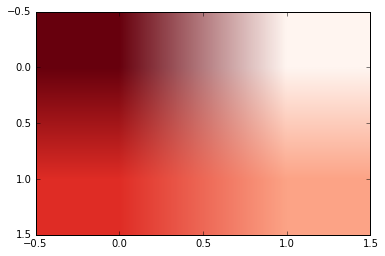

In [23]:
conf_normalized = Conf_Mat.astype('float') / Conf_Mat.sum(axis=1)[:, np.newaxis]
plt.imshow(conf_normalized, cmap=plt.get_cmap('Reds'), aspect='auto')

The above confusion matrix (average Confusion matrix from the decision tree classifier) shows deepest red at the coordinates of X=0 and Y=0 location indicating a prediction of a non-default and an actual result of non-default. Next greatest value was X=0 and Y=1(lower left), indicating a prediction of a non-default, but an actual result of a default. Next greatest color density was X=1, and Y=0 (upper right) indicating a prediction of a default and an actual result of a default. Finally, the plot shows least density of X=1 and Y=1, where there was a prediction of a default and the actual result was a default (lower right). This aligns with our dataset having lower number of defaulters (22% of the overall data set), hence accounting for low counts of the True Positives. 

We observe similar distribution of the Actual vs Predicted Default and non defaulters across all classifiers.

##### ROC Curves - (Exception Points)

In [24]:
import seaborn as sns
sns.set_palette("dark")
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

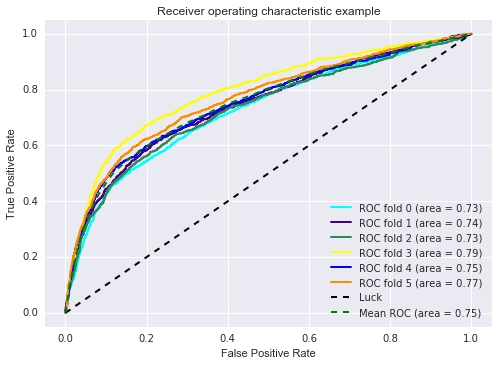

In [25]:
from itertools import cycle
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import roc_curve, auc
cv = StratifiedKFold(n_splits=6)
classifier = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)
# Run classifier with cross-validation and plot ROC curves
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

We obtain the above Receiver Operating Characteristic (ROC) Curve by plotting the True positive rate (TPR) on the Y axis and the False positive rate (FPR) on the X axis. The TPR in this case is predicting positives or defaults when they are truly (in actuality) are defaults. The FPR is the ratio of predicting defaults when they're actually not defaulters.

We spilt the data into 6 iterations and each fold is represented in a different color. This helps to visualize which fold performs best (fold 3 in this case with the AUC of 0.79). The ROC curve is actually a good fit curve for the Random Forest Classifier as the Area under the curve (AUC) is large enough for each fold and this proves that our prediction models are acceptably accurate.

#### Comparing the classification models 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

dt_stump = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
print('Accuracies of KNN, Random Forest, Decision Tree Classifiers and ADA Boost !')
# lets train some trees
clf_array = [
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier(max_depth=50, n_estimators=50),
    dt_stump,
    AdaBoostClassifier(base_estimator=dt_stump,algorithm="SAMME.R",
                       learning_rate=0.5, n_estimators=50),
    ]

for clf in clf_array:
    acc = cross_val_score(clf,X,y)
    print acc.mean()

Accuracies of KNN, Random Forest, Decision Tree Classifiers and ADA Boost !
0.752933333333
0.8145
0.819066666667
0.806


For each of the model we adjust through the various parameters (as shown above in Model & Evaluation part 3). We choose the best fit model within each classifier and compare the mean accuracy amongst them.

### Modeling & Evaluation - Part 5: Choosing best fit model / Advantages

![title](data/Lab2_LogReg_Fig7.png)


We choose the best fit model within each classifier and get the mean accuracy per classifier to see which classifier is the best fit amongst the 4 - K-Nearest Neighbors, Random Forest Classifier, ADA Boost and Decision Tree Classifiers. The Decision Tree Classifiers with a depth of 5 trees is the best performing classifier in terms of the below 4 metrics - 

    1) Accuracy: the model we have is 81.91% accurate
    
    2) Higher TPR rate: Higher ratio of predicting the true(actual) defaults 36.27%
    
    3) Lower error rate of predicting non-defaulters while customers actually default i.e. 
    lower False Negatives (this is in the early 800s, while for the other classifiers this 
    count is in upper 800s and 1000s)
    
    4) Time: The Decision tree classifier is the fastest and the most efficient performing
    classifier amongst the 4 classifiers.
   


### Modeling & Evaluation - Part 6: Influential Attributes for Default Prediction

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)
[ 0.0590242   0.01217729  0.02077379  0.01356965  0.0623975   0.10338676
  0.04296997  0.02486301  0.02066367  0.01998201  0.0187368   0.05965013
  0.05383353  0.0514752   0.05002716  0.04882544  0.05009978  0.05096445
  0.04630898  0.04580106  0.04180603  0.04267788  0.04578076  0.01420493]
('Generalization score estimate from training data', 0.81329166666666663)


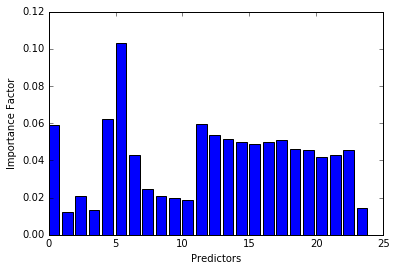

In [7]:
# Feature Importance
#This is based off the Random Classifier

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

print clf
print clf.feature_importances_
print ('Generalization score estimate from training data', clf.oob_score_)

plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.xlabel('Predictors')
plt.ylabel('Importance Factor')
plt.show()

The chart above decpits that we are using 24 different attributes in our classification model. 
The most important and influential features/variables to predict customers who default are - 

    1) Pay 0 - Customer's Payment status (or timeliness) for September
    2) Age - Customer's Age
    3) Bill Amount 1 - Amount billed for September
    4) Limit_Bal - Limit Balance accorded to the customer
    5) Pay Amount 1 - Amount paid by the customer in September



 ### REGRESSION - Predicting the Payment Amount

Covered end-to-end in  Lab2_Regression_Final.ipynb

### Deployment

We now have 2 tasks built, a classifier to predict if a customer would default or not based on his banking history and demographic information. We can also predict the bill amount they would pay for a particular month based again on their banking history and demographic information.

These models are useful for banking institutions and credit lending agencies so that they are well informed before issuing loans/credit to customers. 

In term of the model's value we think it can be improved by collecting additional data such as - individual's credit score, person's employement status, his income, his mortage information, additional assets, etc

This model would have to be updated on a monthly basis as we have the payment timeliness, bill amount and payment amount details per month. Seasonality is an important factor in predicting the customer spend pattern as the pattern changes throughout the year over different seasons and holidays.   

To deploy this solution, we would first need to work with the financial organization to understand their business requirements and goals. We would need to work with them to understand the specific needs and variations / customizations needed in the model to best fit their organization goals.
